In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_excel('mmc4.xlsx', sheet_name='Glycosylation_enzyme_protein')
df.tail(3)

,Gene,Pathway,DDA_Tumor_vs_NAT_log2FC,DDA_Tumor_vs_NAT_adjP,DDA_ES_vs_NAT_log2FC,DDA_ES_vs_NAT_adjP,DDA_Tumor_vs_ND_log2FC,DDA_Tumor_vs_ND_adjP,DDA_ES_vs_ND_log2FC,DDA_ES_vs_ND_adjP,DIA_Tumor_vs_NAT_log2FC,DIA_Tumor_vs_NAT_adjP,DIA_ES_vs_NAT_log2FC,DIA_ES_vs_NAT_adjP,DIA_Tumor_vs_ND_log2FC,DIA_Tumor_vs_ND_adjP,DIA_ES_vs_ND_log2FC,DIA_ES_vs_ND_adjP
48,TUSC3,Precursor,-0.371474,0.038833,-0.396405,0.087787,-0.969846,0.001978,-0.994778,0.005568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,UGGT1,Trimming,-0.214888,0.017987,-0.149765,0.066932,-1.030174,0.000346,-0.965051,0.000680,-0.822161,0.000111,-0.774971,0.000303,-0.64922,0.002537,-0.602029,0.001147
50,UGGT2,Trimming,0.223400,0.007262,0.237539,0.006814,0.513402,0.000526,0.527541,0.000806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_subset = df[['Gene', 'Pathway', 'DDA_Tumor_vs_NAT_log2FC', 'DDA_Tumor_vs_NAT_adjP', 
                'DIA_Tumor_vs_NAT_log2FC', 'DIA_Tumor_vs_NAT_adjP']].copy()
df_subset['DDA_log10_adjP'] = -df_subset['DDA_Tumor_vs_NAT_adjP'].apply(lambda x: 0 if x == 0 else np.log10(x))
df_subset['DIA_log10_adjP'] = -df_subset['DIA_Tumor_vs_NAT_adjP'].apply(lambda x: 0 if x == 0 else np.log10(x))
# Order Pathway in order of Capping -> Trimming -> Branch
# df_subset = df_subset.sort_values(by='Pathway', key=lambda x: x.map({'Capping': 0, 'Trimming': 1, 'Branch': 2}))
df_subset.tail(5)


,Gene,Pathway,DDA_Tumor_vs_NAT_log2FC,DDA_Tumor_vs_NAT_adjP,DIA_Tumor_vs_NAT_log2FC,DIA_Tumor_vs_NAT_adjP,DDA_log10_adjP,DIA_log10_adjP
46,STT3A,Precursor,-1.626472,0.000002,-1.765419,0.001598,5.739637,2.796503
47,STT3B,Precursor,-0.642060,0.000006,0.593543,0.099408,5.227914,1.002579
48,TUSC3,Precursor,-0.371474,0.038833,NaN,NaN,1.410797,NaN
49,UGGT1,Trimming,-0.214888,0.017987,-0.822161,0.000111,1.745037,3.953337
50,UGGT2,Trimming,0.223400,0.007262,NaN,NaN,2.138923,NaN


(0.0, 12.0)

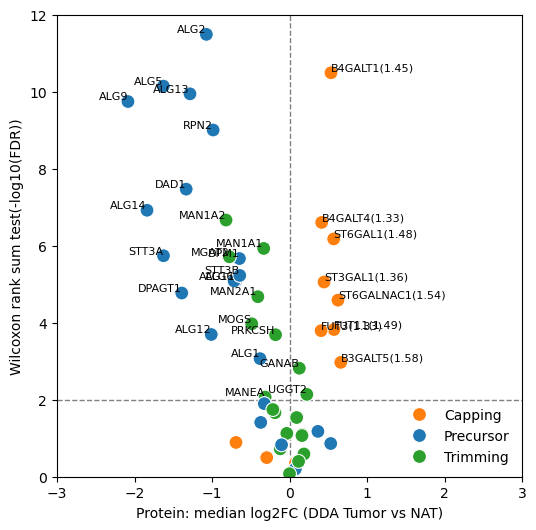

In [40]:
plt.figure(figsize=(6, 6))

sns.scatterplot(data=df_subset, x='DDA_Tumor_vs_NAT_log2FC', y='DDA_log10_adjP',
                hue='Pathway', palette= {"Precursor": '#1f77b4',"Capping": '#ff7f0e',"Trimming": '#2ca02c'},
                s=100, alpha=1, edgecolor='w')

for (_, row) in df_subset.iterrows():
    if row['DDA_log10_adjP'] > 2:
        if row['DDA_Tumor_vs_NAT_log2FC'] > 0 and row["Pathway"] == "Capping":
            plt.text(row['DDA_Tumor_vs_NAT_log2FC'], row['DDA_log10_adjP'], f"{row['Gene']}({2**row["DDA_Tumor_vs_NAT_log2FC"]:.2f})",
                     fontsize=8, ha='left', va='bottom', zorder=5)
        else:
            plt.text(row['DDA_Tumor_vs_NAT_log2FC'], row['DDA_log10_adjP'], f"{row['Gene']}",
                     fontsize=8, ha='right', va='bottom', zorder=5)

plt.axhline(y=2, color='grey', linestyle='--', linewidth=1, zorder = 0)
plt.axvline(x=0, color='grey', linestyle='--', linewidth=1, zorder = 0)
plt.xlabel('Protein: median log2FC (DDA Tumor vs NAT)')
plt.ylabel('Wilcoxon rank sum test(-log10(FDR))')
plt.legend(frameon=False, loc = "lower right")
plt.xlim(-3, 3)
plt.ylim(0, 12)